<a href="https://colab.research.google.com/github/Aishwarya-J05/Pytorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [33]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [34]:
torch.__version__

'2.10.0+cu128'

In [35]:
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")

GPU is available: Tesla T4


# 1. Data preparing and loading

We will use linear regression formula to make Straight line with known **parameters**.

In [36]:
# Craete known paramneters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
len(X), len(y)

(50, 50)

# Splitting data into training and testing sets

In [38]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [39]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [40]:
def plot_predictions(train_data = X_train, train_lables = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_lables, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # pllot predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # legends
  plt.legend(prop = {"size":14});

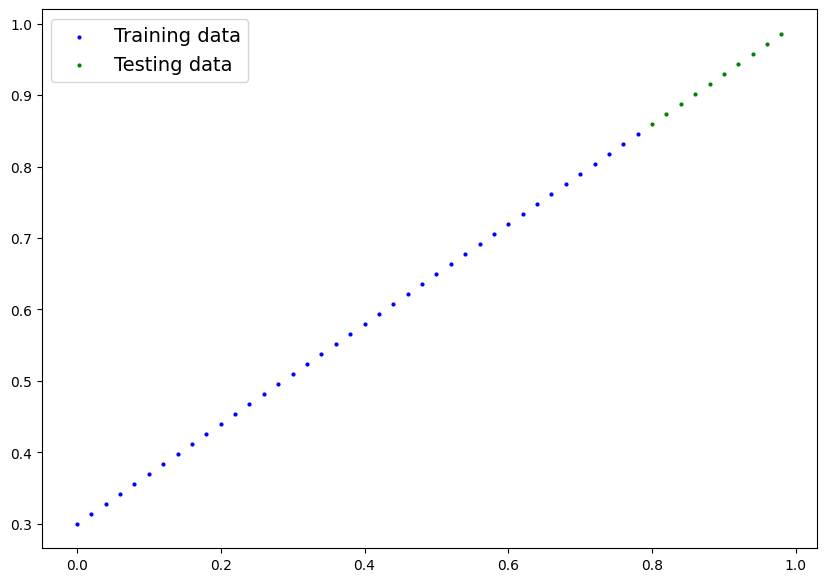

In [41]:
plot_predictions();

# Building the PyTorch model

In [42]:
from torch import nn

# creaate linear regression mkdel class
class LinearRegressionModel(nn.Module): #Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
       super().__init__()
       self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
       self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weights * x + self.bias

In [43]:
# Create a ransdom seed
torch.manual_seed(42)

# create an instance of the model (this is the subclass of nn.Module)
model_0=LinearRegressionModel()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
weight,bias

(0.7, 0.3)

## Makiing predictions using `torch.inference_mode()`

In [46]:
# Make predictions with modek
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [47]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

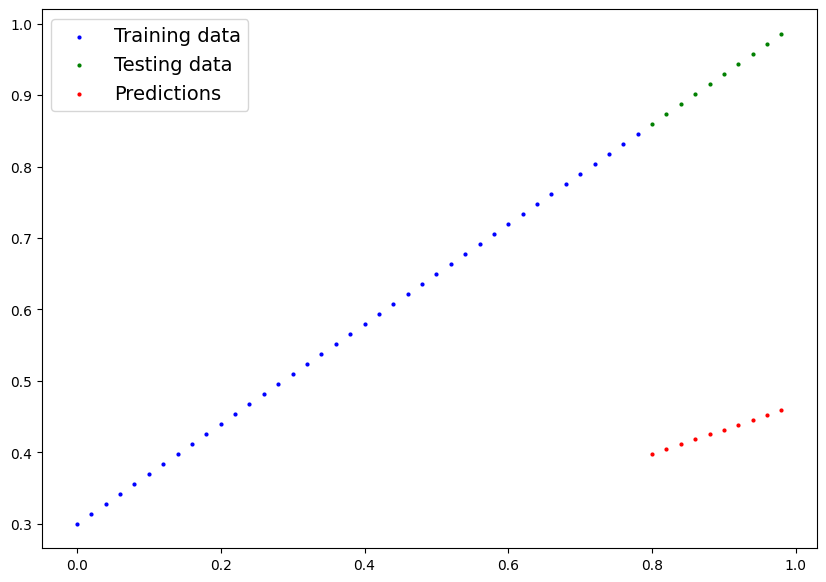

In [48]:
plot_predictions(predictions=y_preds)

# 3. Train model

To measure how poorly the the model predictions are we use 'loss functions'

**Loss Functions:** A function to measure how wrong your model's predictions are to the ideal outputs. Lower is better

**Optimizer:** Takes into account the loss of a model and adjusts the model's parameters
(ex. weight and bias)

In [49]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [50]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [51]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup a cost function (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr=Learning rate

## Building a training loop in PyTorch:

0. Loop through the data
1. Forward pass (this involves the data moving through our model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backwards through the nettwork to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss (**gradient descent**)

In [102]:
torch.manual_seed(42)

# An epoch is one loop through the data
epochs=1

### Training
# 0. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off gradient tracking

  # Print out model state_dict()
  print(model_0.state_dict())

Loss:0.06395438313484192
OrderedDict({'weights': tensor([0.4361]), 'bias': tensor([0.3613])})


In [103]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4361])), ('bias', tensor([0.3613]))])

In [105]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

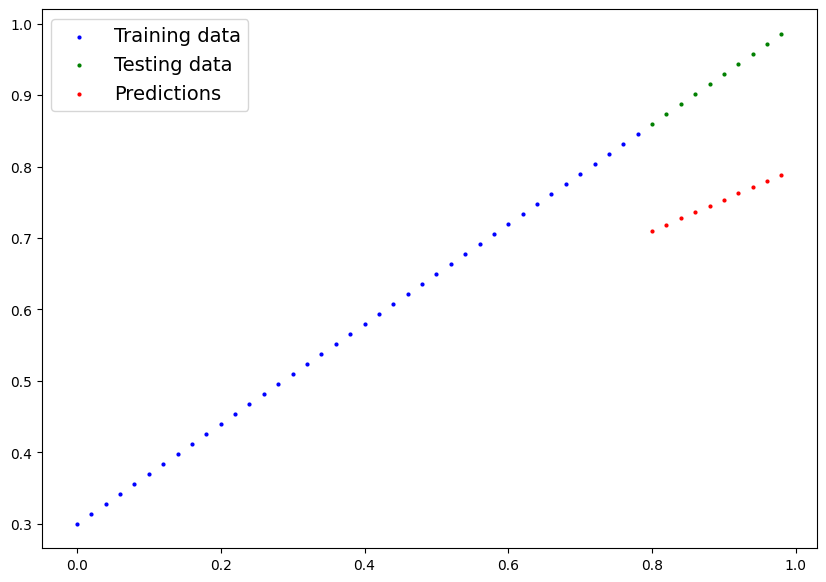

In [106]:
plot_predictions(predictions=y_preds_new)